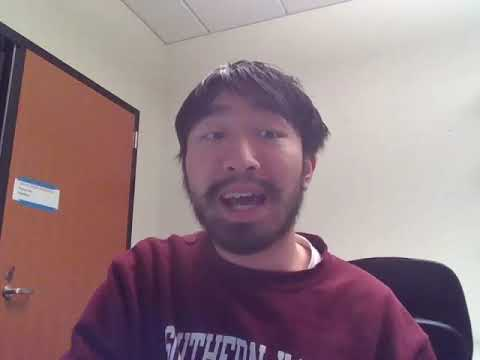

In [4]:
from IPython.display import YouTubeVideo

id = 'fHagIHOTEvM'
YouTubeVideo(id = id, width = 900,height = 600, 
             cc_load_policy = 1, cc_lang_pref = 'eng',
            start = 15, autoplay =1)

# Introduction to PyMC3 - Overview
Duration: (2:48)

Welcome to the Bayesian Statistics in Python training. In this lecture, you will learn how to quantify uncertainty using the Bayesian way. 

For example, if you want to know the probability that a certain
American football player will make a field goal, using the Bayesian method, you will leverage your prior knowledge that you have about the player to form an initial understanding and observe the player performance to be able to update your belief. 

We can combine both sources of knowledge to improve our estimate that lead to a better understanding that the player will make the field goal.

In [2]:
# First, let's import the pandas and numpy libraries
import pandas as pd
import numpy as np

# In addition, I want to show some plots, so we'll import matplotlib as well
import matplotlib.pyplot as plt

# Finally, we'll bring in the scipy stats libraries
from scipy import stats

In [3]:
# The data for this lecture comes from the footballdb website, let's read it in to a pandas DataFrame
data = pd.read_csv('nfl.csv')
# And let's look at the first few lines
data.head()

,Player,Team,PAT,FG,0-19,20-29,30-39,40-49,50+,Lg,Pts
0,Harrison Butker,KC,0.938,0.895,0/0,9/9,9/10,13/13,3/6,56,147
1,Wil Lutz,NO,0.980,0.889,1/1,9/9,6/6,13/15,3/5,58,144
2,Justin Tucker,BAL,0.966,0.966,0/0,8/8,9/9,10/11,1/1,51,141
3,Zane Gonzalez,ARI,0.971,0.886,0/0,12/12,12/13,5/8,2/2,54,127
4,Matt Gay,TB,0.896,0.771,0/0,6/6,5/7,11/14,5/8,58,124


So, we can see that the data includes the player name, some team identification, their probability of
attaining a field goal under the column FG, and information about how successful the kicker was in achieving
a field goal each time they tried at given distances. For instance, we can see in the second row that Wil Lutz was the only kicker to attempt a field goal within 20 yards, and he was successful, while at 50 or more yards out everyone has attempted but only a couple have perfectly achieved a field goal.

Let's look at a histogram of the field goal probability. A histogram is just a bar chart that is commonly used to describe the frequency distribution of the data. 

Text(0.5, 1.0, 'Field Goal Probability')

<Figure size 576x576 with 0 Axes>

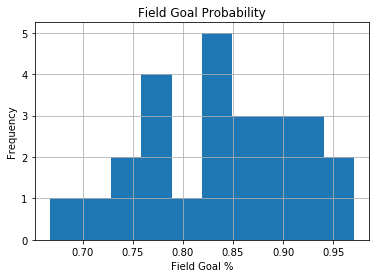

In [4]:
# First let's create a new figure using the figure function of matplotlib
fig = plt.figure(figsize = (8,8))
# You'll notice I decided to set the figure size at 8 inches wide by 8 inches tall using the figsize parameter

# Now we'll just plot the histogram using the convenience function of pandas, 
# indicating we want column FG to be the one plotted
data.hist(column = "FG")

# Finally, let's set the label for the x and y axes
plt.xlabel("Field Goal %")
plt.ylabel("Frequency")

# And set the title and show the plot
plt.title("Field Goal Probability")
#plt.show()

Here you can see most American football player made roughly 80% of the field goal, only few of them making less than 70% or more than 90%.

So in this video, we have seen how to import a data set, and explain the data using visuals such as histogram. 

The Bayesian statistics in Python training consists of two parts. In the next video we'll introduce the Bayesian concepts associated with creating Bayesian models, and in the second part we'll learn PyMC3, an elegant Python package in implementing Bayesian models. Bye for now!

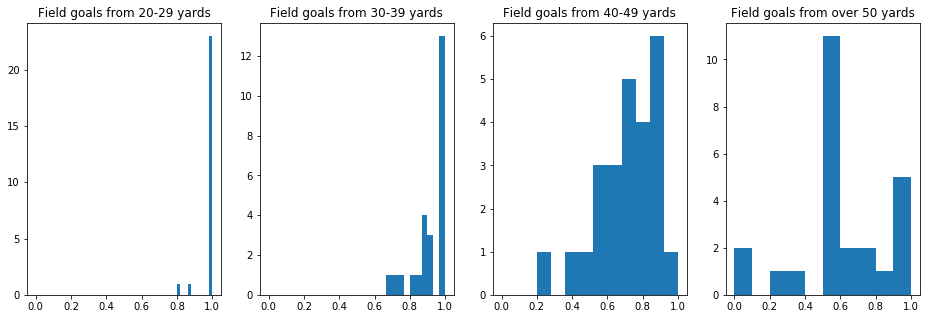

In [22]:
# Let's import re module
import re

# We use regex pattern to capture the numerator and denominator stored in fraction strings
def fraction(row):
    fraction_pattern = re.compile(r"^(?P<num>[0-9]+)/(?P<den>[0-9]+)$")
    # Then divide the numerator by the denominator extracted from the fraction string
    result = float(fraction_pattern.search(row).group(1)) / float(fraction_pattern.search(row).group(2))
    return result


# We can use matplotlib.pyplot.subplot function to create 4 histograms together 
# We turn on the share x-axis feature so each of the plots adapts to its own x range.
fig, axes = plt.subplots(1, 4, sharex = True, figsize = (16,5))

# We apply the fraction function to compute the probability for each player to make field 
# goals based on different distances
axes[0].hist(data['20-29'].apply(fraction))
axes[0].set_title("Field goals from 20-29 yards")
axes[1].hist(data['30-39'].apply(fraction))
axes[1].set_title("Field goals from 30-39 yards")
axes[2].hist(data['40-49'].apply(fraction))
axes[2].set_title("Field goals from 40-49 yards")
axes[3].hist(data['50+'].apply(fraction))
axes[3].set_title("Field goals from over 50 yards")
plt.show()